# KNN Classifier for Stress Detection and Management 

This jupyter notebook demostrates the application of the **KNN Classifier** to a dataset that has the following features:
HeartRate, SkinConductance, EEG,Temperature, PupilDiameter,SmileIntensity, FrownIntensity, CortisolLevel, ActivityLevel,AmbientNoiseLevel, LightingLevel, EmotionalState, ES_disengaged,ES_engaged, ES_partially engaged, CognitiveState, CS_distracted,CS_focused, EngagementLevel.

The expected outcome of this ipynb is to be able to predict the Engagement Level of individuals. This target variable have various applications, and the ones we will be focusing on are stress detection and management systems.

# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple and versatile machine learning algorithm used for both classification and regression tasks. It works by identifying the k closest data points (neighbors) to a given input, based on a chosen distance metric (e.g., Euclidean distance).
For classification, KNN predicts the class of a data point by taking a majority vote among the classes of its neighbors. For regression, it predicts the value by averaging the values of the neighbors.

KNN is a non-parametric and instance-based algorithm, meaning it does not assume a specific data distribution and makes predictions using the entire training dataset.

# Objectives of this notebook

1. Model Training
2. Model Evaluation
3. Visualization 

## Import the required Pacakages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the required dataset

In [3]:
data_path = "/Users/software/Desktop/Sem1_stevens/Knowledge_discovery_and_Data_mining/final_project/CS513-A/KNN/KNN_Dataset.csv"
df = pd.read_csv(data_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             1000 non-null   int64  
 1   SkinConductance       1000 non-null   float64
 2   EEG                   1000 non-null   float64
 3   Temperature           1000 non-null   float64
 4   PupilDiameter         1000 non-null   float64
 5   SmileIntensity        1000 non-null   float64
 6   FrownIntensity        1000 non-null   float64
 7   CortisolLevel         1000 non-null   float64
 8   ActivityLevel         1000 non-null   int64  
 9   AmbientNoiseLevel     1000 non-null   int64  
 10  LightingLevel         1000 non-null   int64  
 11  EmotionalState        1000 non-null   object 
 12  ES_disengaged         1000 non-null   int64  
 13  ES_engaged            1000 non-null   int64  
 14  ES_partially engaged  1000 non-null   int64  
 15  CognitiveState        

In [5]:
attr = df.drop(columns=['EngagementLevel', 'ES_disengaged', 'ES_engaged', 'ES_partially engaged', 'CS_distracted', 'CS_focused'], axis=1).select_dtypes(exclude='object')
target = df['EngagementLevel']


attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

In [6]:
attr_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 904 to 867
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          700 non-null    int64  
 1   SkinConductance    700 non-null    float64
 2   EEG                700 non-null    float64
 3   Temperature        700 non-null    float64
 4   PupilDiameter      700 non-null    float64
 5   SmileIntensity     700 non-null    float64
 6   FrownIntensity     700 non-null    float64
 7   CortisolLevel      700 non-null    float64
 8   ActivityLevel      700 non-null    int64  
 9   AmbientNoiseLevel  700 non-null    int64  
 10  LightingLevel      700 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 65.6 KB


In [24]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 904 to 867
Series name: EngagementLevel
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


In [25]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel
0,0.016949,0.595629,0.589697,0.334290,0.666084,0.689828,0.236418,0.068556,0.683417,1.000000,0.131994
1,0.000000,0.842340,0.958107,0.412519,0.715587,0.561374,0.114243,0.044301,0.778894,0.310345,0.253945
2,0.355932,0.243582,0.310810,0.117450,0.410145,0.417964,0.284373,0.615139,0.276382,0.000000,0.760402
3,1.000000,0.036980,0.226519,0.803964,0.096379,0.139608,0.629179,0.779606,0.195980,0.344828,0.430416
4,0.983051,0.031263,0.048898,0.832552,0.225216,0.063732,0.870183,0.903025,0.050251,0.413793,0.869440


In [21]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [3]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 0.6366666666666667%



In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[ 55  71]
 [ 38 136]]

Accuracy score
0.6366666666666667

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.44      0.50       126
           2       0.66      0.78      0.71       174

    accuracy                           0.64       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.63      0.64      0.63       300




This matrix represents the model's predictions. The rows correspond to the actual classes, while the columns represent the predicted classes. Here's the breakdown:

- **True Positives (TP)**: 136 (class 2 predicted as class 2)
- **True Negatives (TN)**: 55 (class 1 predicted as class 1)
- **False Positives (FP)**: 71 (class 1 predicted as class 2)
- **False Negatives (FN)**: 38 (class 2 predicted as class 1)

## Accuracy Score

The accuracy score of the model is **0.6367** or 63.67%, indicating that the model correctly predicted the engagement level in 63.67% of cases.

## Classification Report

The classification report provides detailed metrics for each class:

### Class 1 Performance:
- **Precision**: 0.59, meaning that when the model predicts class 1, it is correct 59% of the time.
- **Recall**: 0.44, indicating that the model correctly identifies 44% of the actual class 1 instances.
- **F1-Score**: 0.50, representing a balance between precision and recall for class 1.

### Class 2 Performance:
- **Precision**: 0.66, meaning that when the model predicts class 2, it is correct 66% of the time.
- **Recall**: 0.78, showing that the model identifies 78% of the actual class 2 instances.
- **F1-Score**: 0.71, indicating a strong balance between precision and recall for class 2.

### Overall Model Performance:
- **Accuracy**: 0.64, meaning the model has an overall accuracy of 64% across both classes.
- **Macro Average**: The average of precision, recall, and F1-score across both classes:
  - Precision: 0.62
  - Recall: 0.61
  - F1-Score: 0.61
- **Weighted Average**: The weighted average of precision, recall, and F1-score, considering the support of each class:
  - Precision: 0.63
  - Recall: 0.64
  - F1-Score: 0.63


[Text(0, 0.5, 'M'), Text(0, 1.5, 'B')]

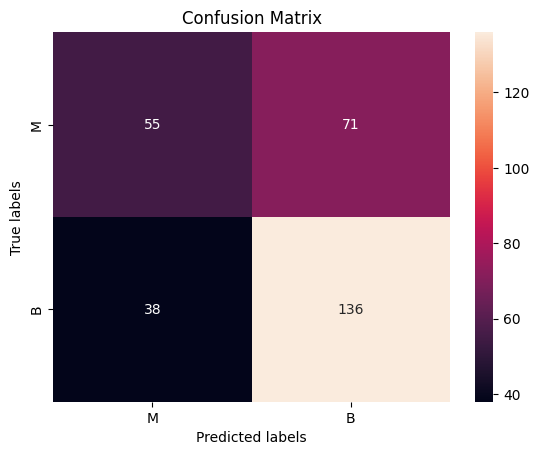

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M', 'B'])
ax.yaxis.set_ticklabels(['M', 'B'])